In [1]:
# extract and clean data

datas = """
1,13.3
2,16.4
3,20.1
4,25.3
5,31.1
6,37.6
7,44.7
8,52.5
9,61.0
10,70.2
11,80.1
12,90.7
13,102.1
14,114.3
15,127.3
16,141.0
17,155.5
18,170.8
19,186.9
20,203.8
21,221.5
22,240.1
23,259.5
24,279.7
25,300.8
26,322.7
27,345.5
28,369.1
29,393.7
30,419.2
31,445.5
32,472.7
33,500.8
34,529.8
35,559.6
36,590.4
37,622.0
38,654.6
39,688.1
40,722.4
41,757.7
42,793.8
43,830.8
44,868.7
45,907.6
46,947.3
47,987.9
48,1029.4
49,1071.9
50,1115.2
51,1160.4
52,1205.5
53,1251.5
54,1298.5
55,1346.3
56,1394.9
57,1444.5
58,1495.0
59,1546.3
60,1598.5
61,1651.5
62,1705.5
63,1760.3
64,1815.9
65,1872.4
66,1930.0
67,1987.4
68,2045.7
69,2104.9
70,2164.9
71,2225.9
72,2287.8
73,2349.6
74,2412.2
75,2475.8
76,2539.2
77,2603.5
78,2667.8
79,2732.9
80,2797.9
81,2863.8
82,2929.7
83,2995.4
84,3061.0
85,3126.5
86,3192.0
87,3257.4
88,3322.7
89,3387.9
90,3453.0
91,3517.9
92,3582.7
93,3647.5
94,3712.2
95,3776.7
96,3841.2
97,3905.6
98,3969.9
99,4034.1
100,4098.2
"""
datas = datas.split()
x, y = list(), list()
for data in datas:
    a, b = data.split(',')
    x.append(a)
    y.append(b)

In [2]:
# load library numpy

import numpy as np

# convert to array

X = np.array(x, dtype=float)
y = np.array(y, dtype=float)

In [3]:
# reshape X array

Xd = np.column_stack([np.ones((len(X), 1)), X, X**2, X**3])

In [4]:
# scale

X_mean = Xd[:, 1:].mean(axis=0)
X_std = Xd[:, 1:].std(axis=0)
Xd[:, 1:] = (Xd[:, 1:] - X_mean) / X_std
y_mean = y.mean()
y_std = y.std()
yd = (y - y_mean) / y_std

In [5]:
# create msk split

val_size = 0.8
msk = np.random.rand(len(Xd)) < val_size

In [6]:
# create train val data

X_train, X_val = Xd[msk], Xd[~msk]
y_train, y_val = yd[msk], yd[~msk]

In [7]:
# hyper parameter

lr = 0.001
eps = 10000

In [8]:
# lss hist

lss_hist = list()

In [9]:
# m_samples, n_features

m_train, n_train = X_train.shape

In [10]:
# theta (weight)

theta = np.zeros(n_train)

In [11]:
# model

for i in range(eps):
    err = ((X_train.dot(theta) - y_train))
    lss_hist.append(np.mean(err ** 2))
    theta -= lr * (2 * X_train.T.dot(err))

lss_val = np.mean((X_val.dot(theta) - y_val) ** 2)
lss_train = np.mean((X_train.dot(theta) - y_train) ** 2)

In [12]:
theta

array([ 1.70997662e-04, -2.22821604e-02,  1.20230290e+00, -1.83727767e-01])

In [13]:
print(f'lss val: {lss_val:6f} - lss train: {lss_train:.6f}')

lss val: 0.000307 - lss train: 0.000230


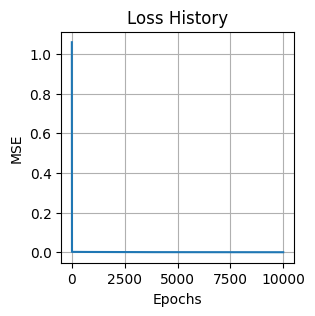

In [14]:
# load library

import matplotlib.pyplot as plt

# plot lss hist on train

plt.figure(figsize=(3, 3))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss History')
plt.grid(True)
plt.plot(lss_hist)
plt.show()